In [1]:
#To handle data in the form of rows and columns
import pandas as pd
#For numerical libraries
import numpy as np
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
%matplotlib inline
# these are ensemble technique to boost the result
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# these are the classification technique
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#for checking the accuracy of model, confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#for scaling the data
from sklearn.preprocessing import StandardScaler
#for tuning the parameters and cross_val_score is used to overfitting and underfitting of model
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# to remove the warning
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loaded the Dataset and stored it in variable "df"
df=pd.read_csv('SBI_Life_insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [3]:
#checking the first five rows of the Dataset to get the overview of the overall Data
df.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#checking the last five rows of the Dataset to get the overview of the overall Data
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [5]:
#Dataset contains 1338 rows and 8 columns
df.shape


(1338, 8)

In [6]:
df.dtypes
# datatypes of each column
#All variable are of Numeric Type
#Variables "sex","smoker" and "insurancetype" are categotical variables.





age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [7]:
df.columns
#target data----insuranceclaim
#input data---rest column names
# target data type is categorical data so we have to apply classification


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
# checking the missing values
df.isnull().sum()
# no null value present

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

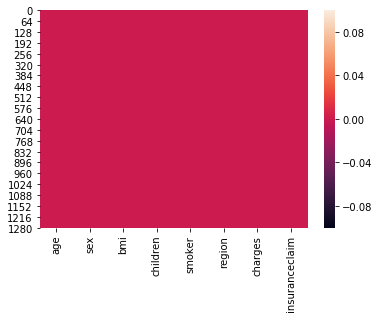

In [9]:
sns.heatmap(df.isnull())
#no null value present

In [10]:
#now lets see the summary of the statistics of the dataset pertaining to the dataset columns,
df.describe()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [11]:
#checking the correlation of every column
df.corr()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


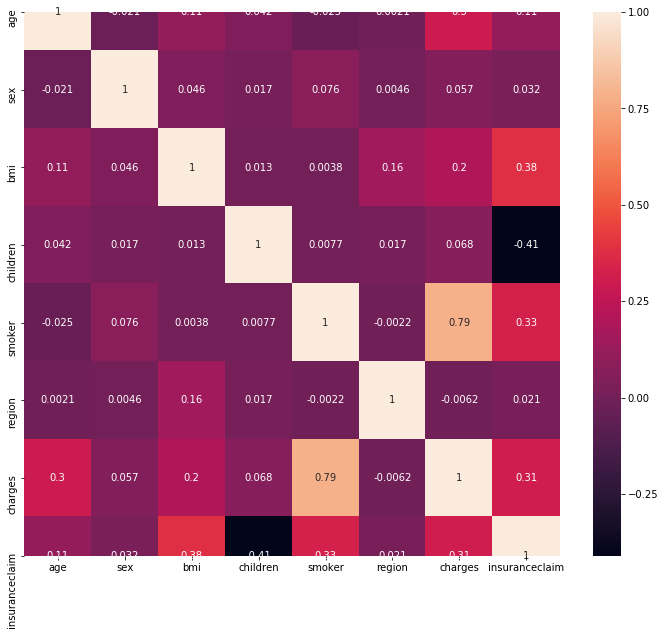

In [12]:
#graphical representation of correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
#here children is -vely correlated to insuranceclaim
#we can drop it



In [13]:
#lets check the skewness of dataset
df.skew()


age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182CA19B748>,
      dtype=object)

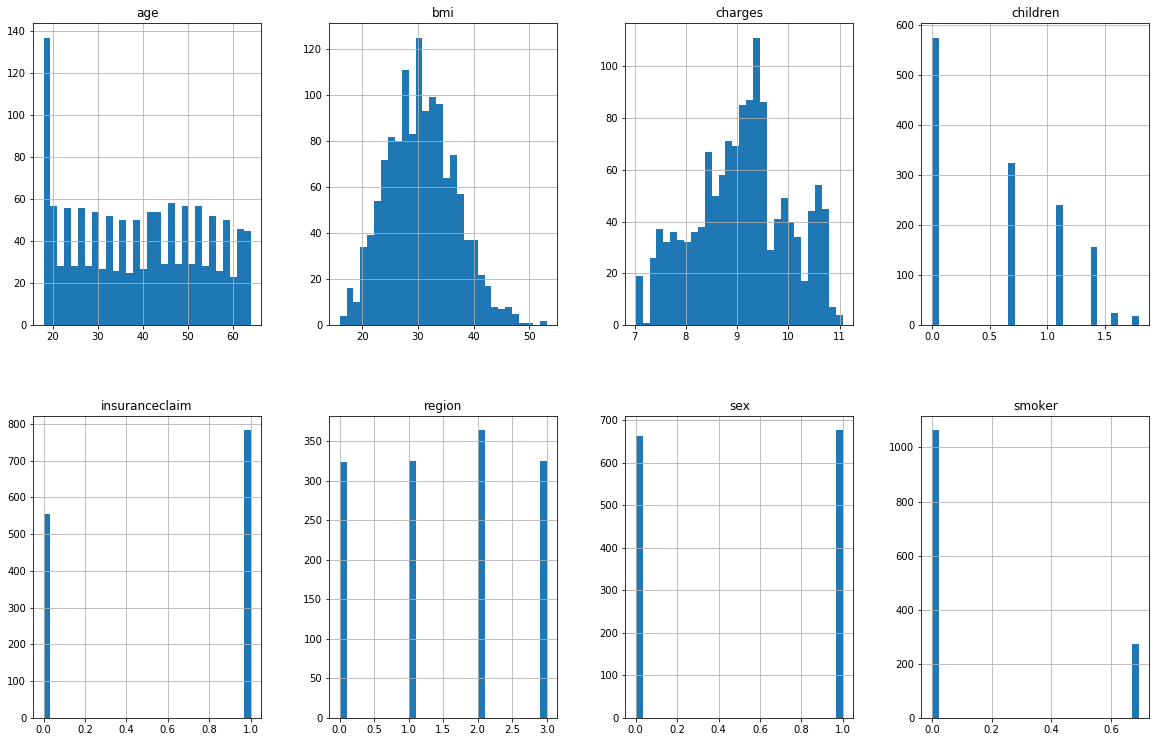

In [19]:
#skewness in the form of histogram
df.hist(figsize=(20,20), grid = True, layout = (3,4), bins = 30)


In [14]:
#removing skewness using log
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [15]:
#lets check again skewness
df.skew()


age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [18]:
# lets check outlier
from scipy.stats import zscore

z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)
#outlier removed

(1338, 8)
(1334, 8)


# univarient and bivarient analysis

In [24]:
#Let's check how many unique values does the target feature 'insuranceclaim' has?

df1["insuranceclaim"].unique()


array([1, 0], dtype=int64)

In [25]:
df1.insuranceclaim.value_counts().sort_index()


0    555
1    779
Name: insuranceclaim, dtype: int64

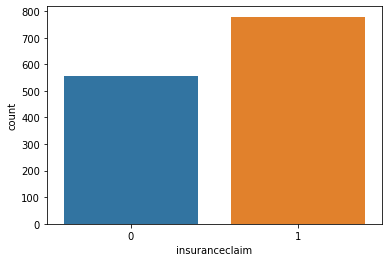

In [26]:
#plotting the graph for visualizing better the distribution of "insuranceclaim" variable.
sns.countplot(x='insuranceclaim', data=df1)


In [28]:
#dist plot of each column
collist=df1.columns.values
ncol=8
nrows=10


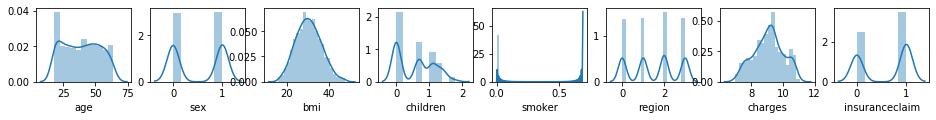

In [29]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df1[collist[i]])


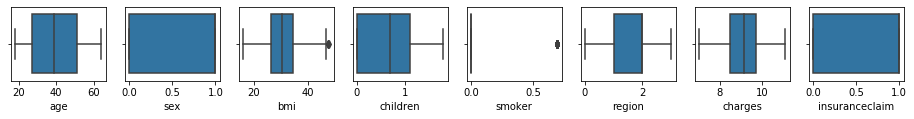

In [31]:
#boxplot of each column
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]])


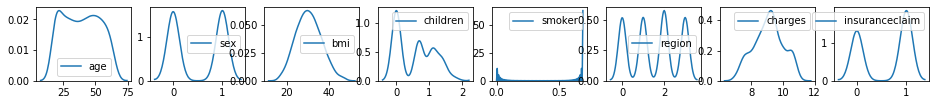

In [32]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.kdeplot(df1[collist[i]])


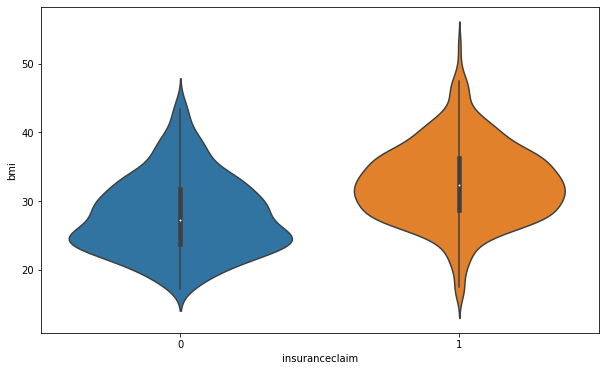

In [33]:
#violinplot 
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'insuranceclaim', y = 'bmi', data = df1)
#The below graph shows people with insurance claim are more than non insurance claim
#From below graph we can see that people with higher bmi tends to take more insurance claim



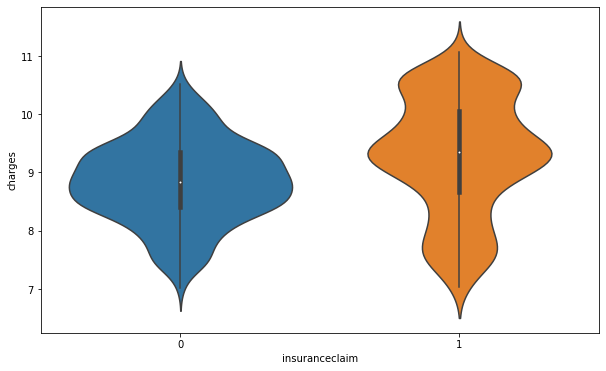

In [34]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'insuranceclaim', y = 'charges', data = df1)


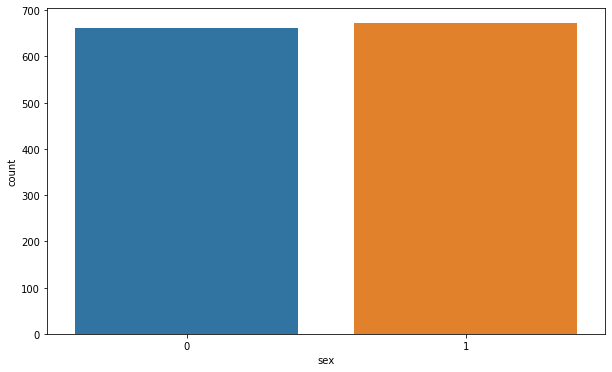

In [40]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'sex', data = df1)


In [38]:
print (df1.sex.value_counts())
# no of female=662 
# no of male=672

1    672
0    662
Name: sex, dtype: int64


In [39]:
print (df1.smoker.value_counts())
#0 represent non smoker
#1 represent smoker

0.000000    1061
0.693147     273
Name: smoker, dtype: int64


In [43]:
print (df1.children.value_counts().unique())
df1.children.value_counts().sort_index()


[572 322 240 157  25  18]


0.000000    572
0.693147    322
1.098612    240
1.386294    157
1.609438     25
1.791759     18
Name: children, dtype: int64

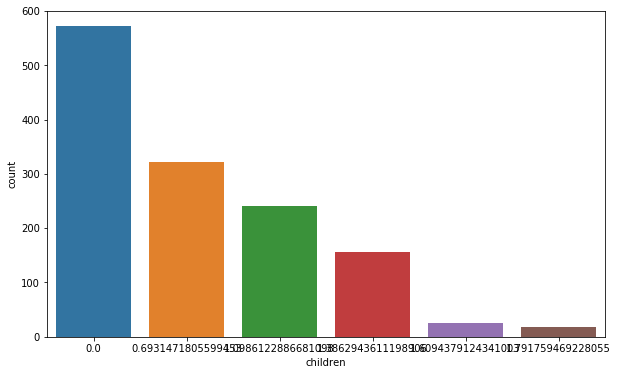

In [45]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'children', data = df1)

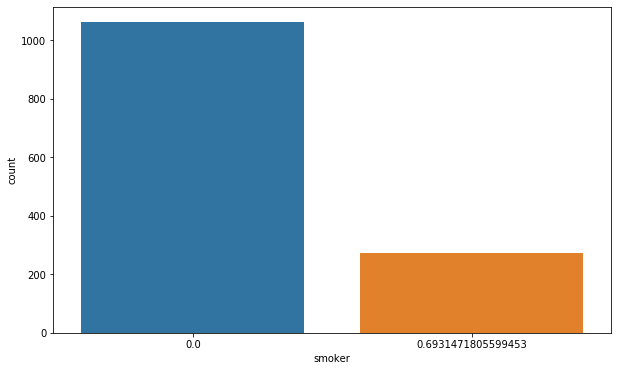

In [46]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'smoker', data = df1)

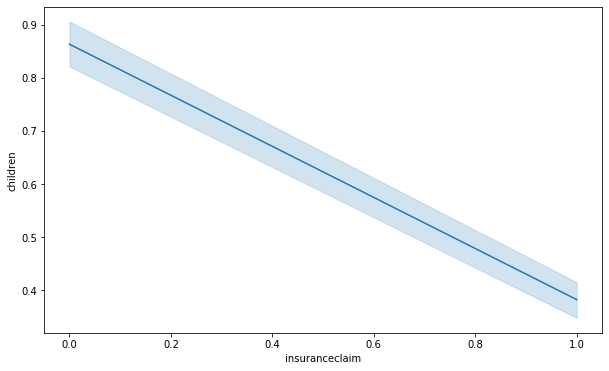

In [48]:
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'insuranceclaim', y = 'children', data = df1)
#we are having negative correlation between number of children and insurance claims

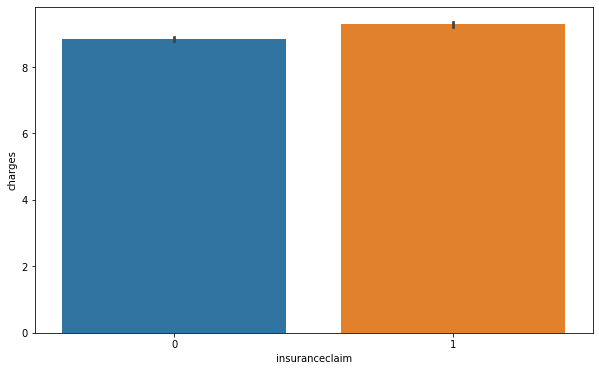

In [50]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'insuranceclaim', y = 'charges', data = df1)
#Higher the charges higher the chance of insurance claim


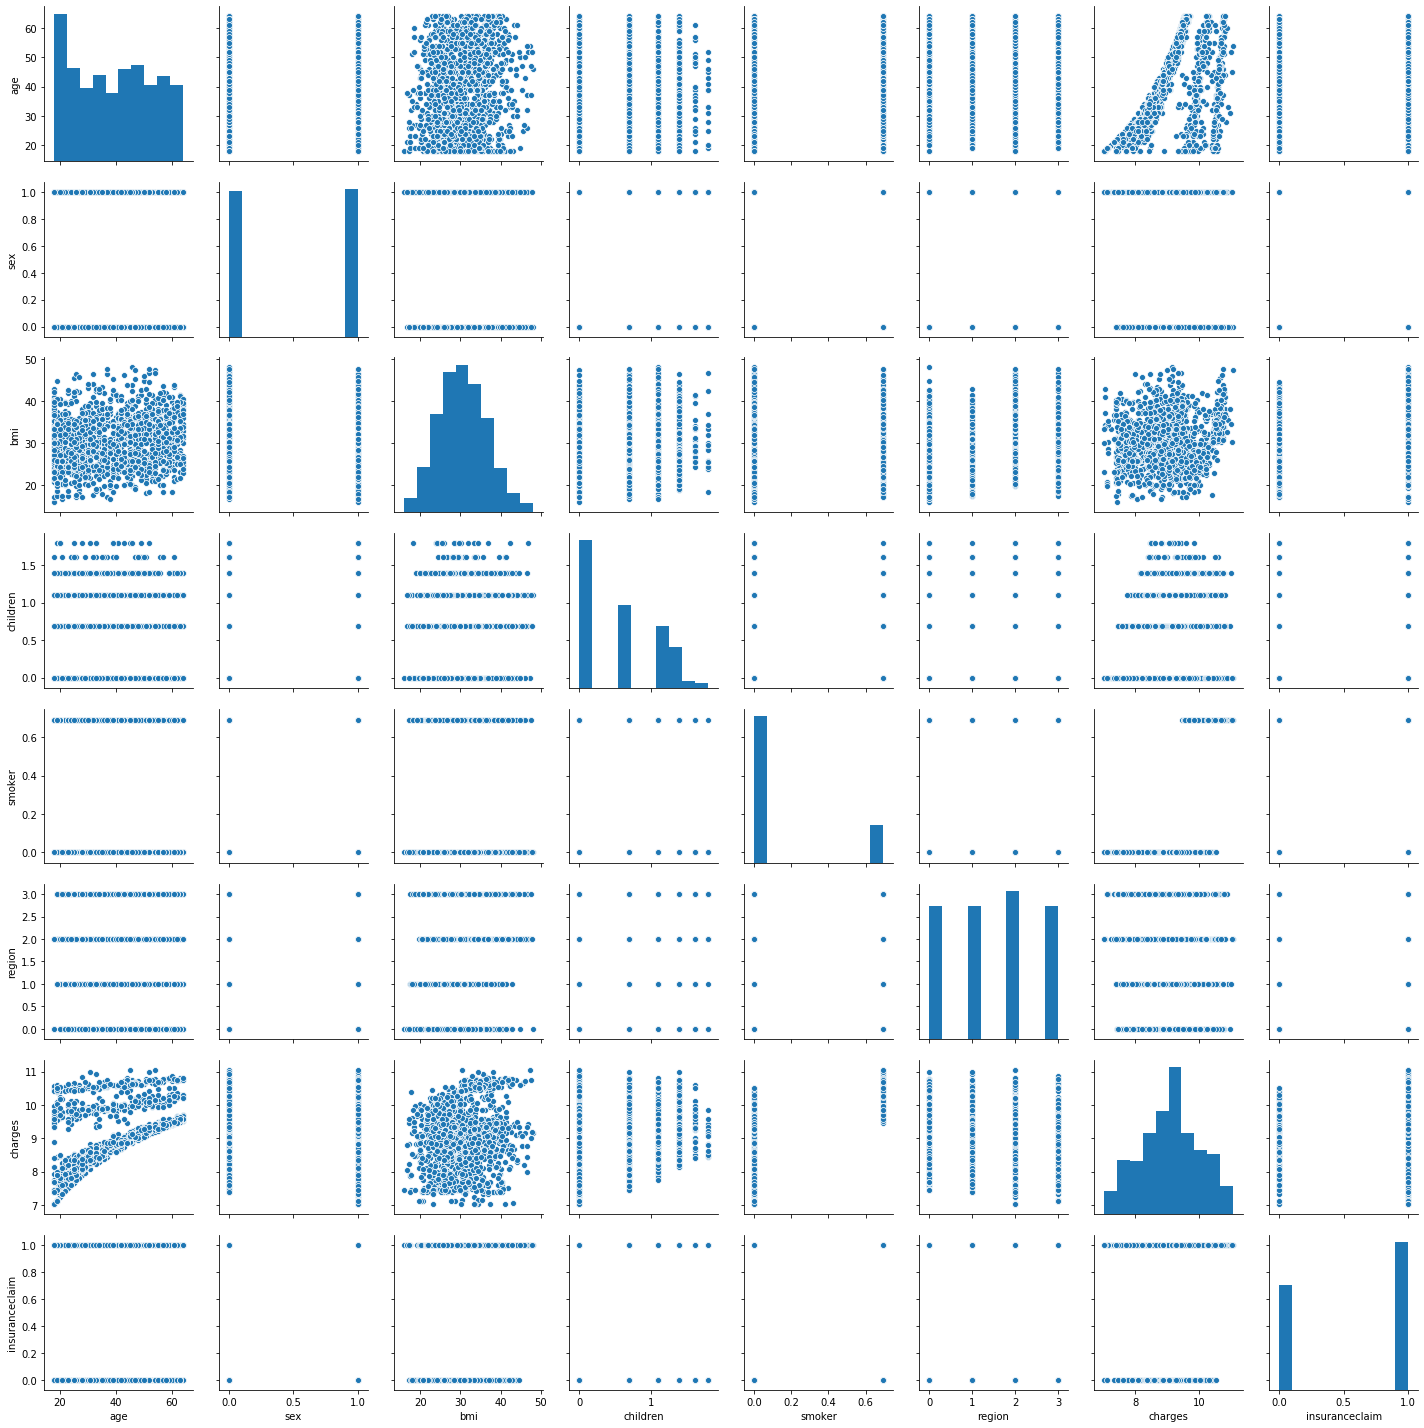

In [51]:
sns.pairplot(df1)


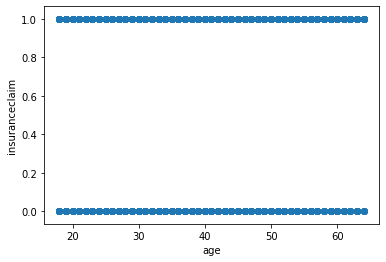

In [53]:
#scatter graph of target variable with respect to age column

plt.xlabel('age')
plt.ylabel('insuranceclaim')
plt.scatter(x,y)
plt.show()


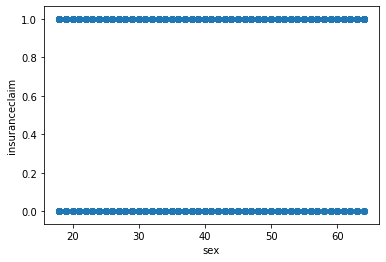

In [54]:
#scatter graph of target variable with respect to sex column

plt.xlabel('sex')
plt.ylabel('insuranceclaim')
plt.scatter(x,y)
plt.show()


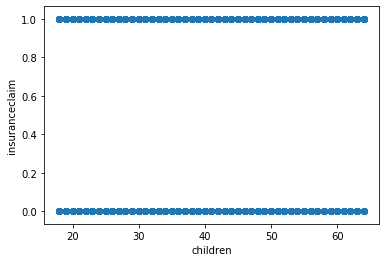

In [55]:
#scatter graph of target variable with respect to children column
plt.xlabel('children')
plt.ylabel('insuranceclaim')
plt.scatter(x,y)
plt.show()


# Now performing Train_Test_Split to separate target and input variables


In [62]:
#since children column is -vely correlated so we can drop it
#df1.drop('children',axis=1,inplace=True)
df1

,age,sex,bmi,smoker,region,charges,insuranceclaim
0,19,0,27.900,0.693147,3,9.734236,1
1,18,1,33.770,0.000000,2,7.453882,1
2,28,1,33.000,0.000000,2,8.400763,0
3,33,1,22.705,0.000000,1,9.998137,0
4,32,1,28.880,0.000000,1,8.260455,1
...,...,...,...,...,...,...,...
1333,50,1,30.970,0.000000,1,9.268755,0
1334,18,0,31.920,0.000000,0,7.699381,1
1335,18,0,36.850,0.000000,2,7.396847,1
1336,21,0,25.800,0.000000,3,7.605365,0


In [67]:
# droping target column from x and store into y 
x = df1.drop('insuranceclaim', axis = 1)
y = df1['insuranceclaim'].values


In [68]:
x.shape

(1334, 6)

In [69]:
#1D
y.shape

(1334,)

In [72]:
#making 2D before sending train_test_split
y=y.reshape(-1,1)
y.shape

(1334, 1)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 81)


In [75]:
print(x_train.shape)
print(x_test.shape)


(1000, 6)
(334, 6)


In [76]:
print(y_train.shape)
print(y_test.shape)


(1000, 1)
(334, 1)


In [78]:
#Applying Standardization Technique to get optimized results through Standard Scaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)


In [104]:
#apply model using for loop and find which state it performs well
for r_state in range(42,101):
        max=r_state
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
        for m in model:
            m.fit(x_train,y_train)
            m.score(x_train,y_train)
            predm=m.predict(x_test)
            print(accuracy_score(y_test,predm))
            print(confusion_matrix(y_test,predm))
            print(classification_report(y_test,predm))
        max=max+1
        print("\n*************************************",max)
        
  # best model is RandomForestClassifier() at random state 79 with accuracy score = 86%


0.7265917602996255
[[ 78  34]
 [ 39 116]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       112
           1       0.77      0.75      0.76       155

    accuracy                           0.73       267
   macro avg       0.72      0.72      0.72       267
weighted avg       0.73      0.73      0.73       267

0.6891385767790262
[[93 19]
 [64 91]]
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       112
           1       0.83      0.59      0.69       155

    accuracy                           0.69       267
   macro avg       0.71      0.71      0.69       267
weighted avg       0.73      0.69      0.69       267

0.7715355805243446
[[ 76  36]
 [ 25 130]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       112
           1       0.78      0.84      0.81       155

    accuracy                           0.77       267
   mac

In [106]:
# finding best parameter using grid search cv
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,200,100,500,1000],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
gsc=GridSearchCV(rfc,parameters,cv=10)
gsc.fit(x_train,y_train)
gsc.best_params_



{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 1000}

# Cross Validation Technique to avoid Overfitting and Underfitting on Decision Tree Classifier Model


In [107]:
#Now lets try to do some evaluation for RandomForestClassifier model using cross validation.
rfc=RandomForestClassifier(random_state=79, max_features='auto', n_estimators= 1000, max_depth=7, criterion='gini')
rfc_eval= cross_val_score(rfc,x,y,cv = 10,scoring='accuracy')
print(rfc_eval.mean())
print(rfc_eval.std())
#I have selected RandomForestClassifier Model as best model as it is giving me best accuracy score




0.8216342246389379
0.024272155097969778


In [108]:
from sklearn.externals import joblib
#save file using joblib
joblib.dump(rfc,'e2_sbi_life_insurance.pkl')

['e2_sbi_life_insurance.pkl']